<a href="https://colab.research.google.com/github/akshitgupta/Predict_shipment_return_to_origin/blob/main/RTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas
import pandas as pd

In [ ]:
# Load csv into dataframe
df=pd.read_csv('training_data.csv',sep='|')
df.head(5)

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,order_id,shipment_id,awb_code,shipment_status,order_source,company_id,channel_base_code,shipment_total,assigned_date_time,awb_shipped_date,awb_delivered_date,awb_rto_initiated_date,awb_rto_delivered_date,gender,cod,etd,delivery_postcode,delivery_city,delivery_state,is_rto
0,92881330,92494735,4526711234262,AWB Assigned,NaN,375871,CS,184.9900,2021-03-03 22:02:01,NaN,NaN,NaN,NaN,0,0,2021-03-09 06:02:01,206122,auraiya,uttar pradesh,0
1,93926086,93538797,SD93538797-kaN,Delivered,NaN,375976,CS,659.9000,2021-03-09 12:05:55,2021-03-09 11:50:00,2021-03-09 15:25:00,NaN,NaN,1,1,NaN,400003,mumbai,maharashtra,0
2,94281448,93893942,31668474946,Delivered,NaN,25267,CS,2.4251,2021-03-10 15:28:33,2021-03-11 22:16:00,2021-03-24 09:33:00,NaN,NaN,1,0,NaN,30035,NaN,NaN,0
3,92833289,92446735,INADS924467359,Delivered,NaN,81562,CS,17.5000,2021-03-03 17:20:43,2021-03-06 13:59:00,2021-03-20 10:53:00,NaN,NaN,2,0,NaN,39440,NaN,NaN,0
4,94364215,93976669,INADS939766698,Delivered,NaN,81562,CS,15.0000,2021-03-10 23:13:01,2021-03-13 11:58:00,2021-03-25 08:38:00,NaN,NaN,1,0,NaN,11235,NaN,NaN,0


In [ ]:
df.shape


(2048321, 20)

In [ ]:
df2=df[['shipment_status','order_id','channel_base_code','shipment_total','assigned_date_time','awb_shipped_date','awb_delivered_date','gender','cod','etd','delivery_postcode','delivery_city','delivery_state','is_rto']]
df2.head(3)

,shipment_status,order_id,channel_base_code,shipment_total,assigned_date_time,awb_shipped_date,awb_delivered_date,gender,cod,etd,delivery_postcode,delivery_city,delivery_state,is_rto
0,AWB Assigned,92881330,CS,184.9900,2021-03-03 22:02:01,NaN,NaN,0,0,2021-03-09 06:02:01,206122,auraiya,uttar pradesh,0
1,Delivered,93926086,CS,659.9000,2021-03-09 12:05:55,2021-03-09 11:50:00,2021-03-09 15:25:00,1,1,NaN,400003,mumbai,maharashtra,0
2,Delivered,94281448,CS,2.4251,2021-03-10 15:28:33,2021-03-11 22:16:00,2021-03-24 09:33:00,1,0,NaN,30035,NaN,NaN,0


In [ ]:
#Checking number of unique entries in each column
for i in df2.columns:
  print(i,' - ',len(df[i].unique()))

shipment_status  -  22
order_id  -  2048321
channel_base_code  -  15
shipment_total  -  67090
assigned_date_time  -  682649
awb_shipped_date  -  146860
awb_delivered_date  -  460733
gender  -  3
cod  -  2
etd  -  809585
delivery_postcode  -  34648
delivery_city  -  2606
delivery_state  -  42
is_rto  -  2


<AxesSubplot:>

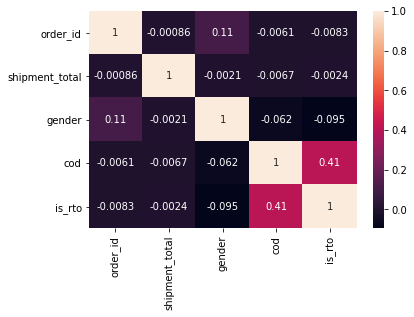

In [ ]:
# Checking Correlation between features
import seaborn as sns

Var_Corr = df2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
# Data Types
df2.dtypes

shipment_status        object
order_id                int64
channel_base_code      object
shipment_total        float64
assigned_date_time     object
awb_shipped_date       object
awb_delivered_date     object
gender                  int64
cod                     int64
etd                    object
delivery_postcode      object
delivery_city          object
delivery_state         object
is_rto                  int64
dtype: object

In [ ]:
# Droping rows with nan values 

df3 = df2[df2.is_rto.notna()] # Negligiblee
df3 = df3[df3.delivery_postcode.notna()]# Negligible
df3 = df3[df3.delivery_city.notna()]# Negligible
#df3 = df3[df2.delivery_state.notna()]# Removed as same as city


df3.shape

(2048036, 14)

In [ ]:
df3.isnull().sum(axis = 0)

shipment_status            0
order_id                   0
channel_base_code          0
shipment_total             0
assigned_date_time         0
awb_shipped_date       64351
awb_delivered_date    391065
gender                     0
cod                        0
etd                    19431
delivery_postcode          0
delivery_city              0
delivery_state             0
is_rto                     0
dtype: int64

In [ ]:
df4 = df3[df3.etd.notna()]
df4 = df4[df4.awb_shipped_date.notna()]
df4 = df4[df4.awb_delivered_date.notna()]
df4 = df4[df4.etd.notna()]
df4.isnull().sum(axis = 0)

shipment_status       0
order_id              0
channel_base_code     0
shipment_total        0
assigned_date_time    0
awb_shipped_date      0
awb_delivered_date    0
gender                0
cod                   0
etd                   0
delivery_postcode     0
delivery_city         0
delivery_state        0
is_rto                0
dtype: int64

In [ ]:
for i in df4.columns:
  print(i,' - ',len(df[i].unique()))

shipment_status  -  22
order_id  -  2048321
channel_base_code  -  15
shipment_total  -  67090
assigned_date_time  -  682649
awb_shipped_date  -  146860
awb_delivered_date  -  460733
gender  -  3
cod  -  2
etd  -  809585
delivery_postcode  -  34648
delivery_city  -  2606
delivery_state  -  42
is_rto  -  2


In [ ]:
df_new=df3[['shipment_status','order_id','channel_base_code','shipment_total','gender','cod','delivery_city','is_rto']]
df_new.reset_index(drop=True,inplace=True)
df_new.head(10)

,shipment_status,order_id,channel_base_code,shipment_total,gender,cod,delivery_city,is_rto
0,AWB Assigned,92881330,CS,184.990,0,0,auraiya,0
1,Delivered,93926086,CS,659.900,1,1,mumbai,0
2,Canceled,94503493,CS,5.000,1,0,hosangabad,0
3,Canceled,93207878,CS,68.000,2,0,bengaluru,0
4,Canceled,92837311,CS,11.600,2,0,dehradun,0
5,Canceled,90594180,WC,71.000,1,0,mumbai,0
6,Canceled,92905963,CS,13.500,0,1,tindivanam,0
7,Canceled,94775177,CS,7.500,1,0,chennai,0
8,Canceled,94187349,WC,7.695,1,1,delhi,0
9,Canceled,92760656,CS,0.010,2,0,kolkata,0


In [ ]:
df_new.shape

(2048036, 8)

# Encoding features

In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


# tranforming the column after fitting
enc = enc.fit_transform(df_new[['gender']]).toarray()


# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)


# concating dataframes 
df_new = pd.concat([df_new, encoded_colm], axis = 1) 


# removing the encoded column.
df_new = df_new.drop(['gender'], axis = 1) 


In [ ]:
#pip install category_encoders


In [ ]:
#binary encoding

import category_encoders as ce

encoder = ce.BinaryEncoder(cols =['delivery_city']) 
encoder2 = ce.BinaryEncoder(cols =['shipment_status']) 
encoder3 = ce.BinaryEncoder(cols =['channel_base_code']) 
# tranforming the column after fitting
newdata = encoder.fit_transform(df_new['delivery_city'])
newdata2 = encoder2.fit_transform(df_new['shipment_status'])
newdata3 = encoder3.fit_transform(df_new['channel_base_code'])

# concating dataframe
df_new = pd.concat([df_new, newdata], axis = 1) 
df_new = pd.concat([df_new, newdata2], axis = 1) 
df_new = pd.concat([df_new, newdata3], axis = 1) 
# dropping old column 

df_new = df_new.drop(['delivery_city'], axis = 1)
df_new = df_new.drop(['shipment_status'], axis = 1)
df_new = df_new.drop(['channel_base_code'], axis = 1)
df_new.head(10)

c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,order_id,shipment_total,cod,is_rto,0,1,2,delivery_city_0,delivery_city_1,delivery_city_2,...,shipment_status_1,shipment_status_2,shipment_status_3,shipment_status_4,shipment_status_5,channel_base_code_0,channel_base_code_1,channel_base_code_2,channel_base_code_3,channel_base_code_4
0,92881330,184.990,0,0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,93926086,659.900,1,0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,94503493,5.000,0,0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,93207878,68.000,0,0,0.0,0.0,1.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,92837311,11.600,0,0,0.0,0.0,1.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
5,90594180,71.000,0,0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6,92905963,13.500,1,0,1.0,0.0,0.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
7,94775177,7.500,0,0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,94187349,7.695,1,0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
9,92760656,0.010,0,0,0.0,0.0,1.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


# Models

In [ ]:
df_new1=df_new.copy(deep=True)
df_new1.drop(['is_rto','order_id','shipment_total'],inplace=True,axis=1)
df_new1.head(3)

,cod,0,1,2,delivery_city_0,delivery_city_1,delivery_city_2,delivery_city_3,delivery_city_4,delivery_city_5,...,shipment_status_1,shipment_status_2,shipment_status_3,shipment_status_4,shipment_status_5,channel_base_code_0,channel_base_code_1,channel_base_code_2,channel_base_code_3,channel_base_code_4
0,0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
df4.columns

Index(['shipment_status', 'order_id', 'channel_base_code', 'shipment_total',
       'assigned_date_time', 'awb_shipped_date', 'awb_delivered_date',
       'gender', 'cod', 'etd', 'delivery_postcode', 'delivery_city',
       'delivery_state', 'is_rto'],
      dtype='object')

In [ ]:
# Our target variable is unbalanced. Hence we will use balanced weight under logistic regression
df_new['is_rto'].value_counts()

0    1723750
1     324286
Name: is_rto, dtype: int64

# Logistic Regression

In [ ]:

from sklearn.model_selection import train_test_split
X = df_new1
y = df_new['is_rto']

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
logreg = LogisticRegressionCV(cv=5,n_jobs=1,random_state=0,class_weight='balanced')
logreg.fit(X_train, y_train)



c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
b=logreg.predict_proba(X)
b

array([[1.000e+00, 1.191e-10],
       [1.000e+00, 1.277e-07],
       [1.000e+00, 9.956e-06],
       ...,
       [1.000e+00, 2.174e-08],
       [1.000e+00, 2.174e-08],
       [1.000e+00, 2.152e-07]])

# Model performance evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[517127     48]
 [     0  97236]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    517175
           1       1.00      1.00      1.00     97236

    accuracy                           1.00    614411
   macro avg       1.00      1.00      1.00    614411
weighted avg       1.00      1.00      1.00    614411



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 614411 points : 697


In [ ]:
gnb.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

# Validation data

In [ ]:
v=pd.read_csv('validation_data.csv',sep='|')

In [ ]:
v2=v[['shipment_status','order_id','channel_base_code','shipment_total','gender','cod','delivery_city']]
v2.head(3)

,shipment_status,order_id,channel_base_code,shipment_total,gender,cod,delivery_city
0,AWB Assigned,96460265,CS,164.99,0,1,bhadra
1,AWB Assigned,96748415,CS,189.99,0,0,jaipur
2,AWB Assigned,96430840,CS,254.99,0,0,ahmedabad


In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


# tranforming the column after fitting
enc = enc.fit_transform(v2[['gender']]).toarray()


# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)


# concating dataframes 
v2 = pd.concat([v2, encoded_colm], axis = 1) 


# removing the encoded column.
v2 = v2.drop(['gender'], axis = 1) 


In [ ]:
#binary encoding

import category_encoders as ce

encoder = ce.BinaryEncoder(cols =['delivery_city']) 
encoder2 = ce.BinaryEncoder(cols =['shipment_status']) 
encoder3 = ce.BinaryEncoder(cols =['channel_base_code']) 
# tranforming the column after fitting
newdata = encoder.fit_transform(v2['delivery_city'])
newdata2 = encoder2.fit_transform(v2['shipment_status'])
newdata3 = encoder3.fit_transform(v2['channel_base_code'])

# concating dataframe
v2 = pd.concat([v2, newdata], axis = 1) 
v2 = pd.concat([v2, newdata2], axis = 1) 
v2 = pd.concat([v2, newdata3], axis = 1) 
# dropping old column 

v2 = v2.drop(['delivery_city'], axis = 1)
v2 = v2.drop(['shipment_status'], axis = 1)
v2 = v2.drop(['channel_base_code'], axis = 1)


c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,order_id,shipment_total,cod,0,1,2,delivery_city_0,delivery_city_1,delivery_city_2,delivery_city_3,...,shipment_status_1,shipment_status_2,shipment_status_3,shipment_status_4,shipment_status_5,channel_base_code_0,channel_base_code_1,channel_base_code_2,channel_base_code_3,channel_base_code_4
0,96460265.0,164.9900,1.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,96748415.0,189.9900,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,96430840.0,254.9900,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,96687141.0,237.4905,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,95926480.0,46.9900,1.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,95926569.0,19.9900,1.0,0.0,1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,95926526.0,24.9900,1.0,0.0,1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,95850299.0,32.7500,1.0,0.0,1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,95850294.0,32.7500,1.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,95850295.0,32.7500,1.0,0.0,1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
v2 = v2.drop(['shipment_total'], axis = 1)
v2 = v2[v2.cod.notna()]
v2 = v2[v2.delivery_city.notna()]
v2 = v2[v2[0].notna()]
v2 = v2[v2[1].notna()]
v2.isnull().sum()

In [ ]:
v3=v2.copy(deep=True)
v3.drop(['order_id'],inplace=True,axis=1)
bv=logreg.predict_proba(v3)
lv=list(bv[:,1]*100)
import numpy as np
myList2 = list(np.around(np.array(lv),2))
av=v2[['order_id']]
av['prob_is_rto']=myList2
#df_output.head(5)
#av.to_csv( 'output.csv', index=False,sep='|')

<ipython-input-276-874b89a822ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av['prob_is_rto']=myList2


In [ ]:
av

,order_id,prob_is_rto
0,96460265.0,0.0
1,96748415.0,0.0
2,96430840.0,0.0
3,96687141.0,0.0
4,95926480.0,0.0
...,...,...
936048,95728293.0,0.0
936049,96074006.0,0.0
936050,96086296.0,0.0
936051,95728267.0,0.0


In [ ]:
test_data

In [ ]:
test_data.drop(['latest_ver'],inplace=True,axis=1)

import re
def to_num(a):
    num= re.findall('[0-9]+',a)
    b="".join(num)
    return int(b)
def to_bin(a):
    if a==0:
        return 0
    return 1
def to_kb(a):
    elem=a[-1]
    if elem=='M':
        b=to_num(a[:-1])
        return (b*1024)
    return (to_num(a[:-1]))
def target(a):
    if a=='High':
        return 1
    return 0

train['installs']=train['installs'].apply(to_num)
train['price']=train['price'].apply(to_num)
train['price']=train['price'].apply(to_bin)
train['size']=train['size'].apply(to_kb)
train['popularity']=train['popularity'].apply(target)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


# tranforming the column after fitting
enc = enc.fit_transform(train[['category','suitable_for']]).toarray()


# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)


# concating dataframes 
train = pd.concat([train, encoded_colm], axis = 1) 


# removing the encoded column.

df=train.copy()
df.drop(['last_update','app_id'],inplace=True,axis=1)
df.drop(['category'],inplace=True,axis=1)
df.drop(['suitable_for'],inplace=True,axis=1)

X = df.copy()

X.drop(['popularity'],inplace=True,axis=1)

In [ ]:
test_data.drop(['latest_ver'],inplace=True,axis=1)

import re
def to_num(a):
    num= re.findall('[0-9]+',a)
    b="".join(num)
    return int(b)
def to_bin(a):
    if a==0:
        return 0
    return 1
def to_kb(a):
    elem=a[-1]
    if elem=='M':
        b=to_num(a[:-1])
        return (b*1024)
    return (to_num(a[:-1]))
def target(a):
    if a=='High':
        return 1
    return 0

test_data['installs']=test_data['installs'].apply(to_num)
test_data['price']=test_data['price'].apply(to_num)
test_data['price']=test_data['price'].apply(to_bin)
test_data['size']=test_data['size'].apply(to_kb)
test_data['popularity']=test_data['popularity'].apply(target)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# tranforming the column after fitting
enc = enc.fit_transform(test_data[['category','suitable_for']]).toarray()

# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)

# concating dataframes 
test_data = pd.concat([test_data, encoded_colm], axis = 1) 

# removing the encoded column.

df=test_data.copy()
df.drop(['last_update','app_id'],inplace=True,axis=1)
df.drop(['category'],inplace=True,axis=1)
df.drop(['suitable_for'],inplace=True,axis=1)

X = df.copy()

X.drop(['popularity'],inplace=True,axis=1)

